In [1]:
import numpy as np

In [2]:
pred = np.load(r'model_eval/omg_pred.npy')

In [3]:
truth = np.load(r'model_eval/omg_truth.npy')

In [4]:
pred.flatten()

array([-2.362763  ,  0.6168608 , -1.2409886 , ...,  0.17150979,
       -2.4526656 ,  4.7450037 ], dtype=float32)

In [5]:
pred[0]

array([[ 1.5535333 , -1.1668344 , -2.201274  , -1.9783983 ],
       [-1.3344238 , -0.5501982 ,  2.8137956 , -2.92661   ],
       [-2.3434997 ,  1.520176  , -1.5432655 , -2.9639792 ],
       [-1.5643151 , -0.12651184, -3.2080956 ,  1.165027  ],
       [-1.5634298 , -0.1784634 , -2.8543673 ,  0.49635807],
       [ 2.078136  , -0.9436459 , -2.3002567 , -1.4387816 ],
       [-0.66743946,  1.0426115 , -2.9561844 , -1.1919228 ],
       [ 0.8920883 , -1.1617936 , -1.9453028 , -1.4626585 ],
       [-2.5224743 ,  0.03795712,  1.2289934 , -2.841834  ],
       [ 0.1833676 ,  0.23290235, -3.0713475 , -1.8182765 ],
       [-2.0813067 ,  1.5762017 , -1.8663827 , -1.70691   ],
       [ 2.6877756 , -1.1309059 , -2.283799  , -2.151875  ],
       [ 2.3000617 , -0.6156103 , -1.6044983 , -2.6526666 ],
       [-1.8086963 , -0.74639314, -1.1761595 ,  1.6209861 ],
       [-1.370871  , -0.8817163 ,  2.6007087 , -3.1510549 ],
       [-1.5699731 , -0.96581715, -2.3911302 ,  2.1988215 ],
       [ 1.2789621 , -0.

In [5]:
_pred = []
for pred_ in pred:
    for pred__ in pred_:

        _pred.append(np.argmax(pred__).item())
len(_pred)

1280

In [6]:
_pred = np.array(_pred).reshape(40,32).flatten()

In [7]:
_pred

array([3, 3, 2, ..., 2, 1, 3])

In [8]:
_truth = truth.flatten()

In [9]:
_truth

array([3, 3, 2, ..., 2, 1, 3])

In [10]:
classes = np.unique(_truth)

# Initialize variables to store results
precision_scores = []
recall_scores = []
f1_scores = []

# Loop over each class and compute precision, recall, and F1-score
for cls in classes:
    # True Positives (TP): Both y_true and y_pred are cls
    TP = np.sum((_truth == cls) & (_pred == cls))
    
    # False Positives (FP): _pred is cls, but _truth is not
    FP = np.sum((_truth != cls) & (_pred == cls))
    
    # False Negatives (FN): _truth is cls, but _pred is not
    FN = np.sum((_truth == cls) & (_pred != cls))
    
    # Precision: TP / (TP + FP)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall: TP / (TP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1-score: 2 * (Precision * Recall) / (Precision + Recall)
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Store results
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Display the results for each class
for i, cls in enumerate(classes):
    print(f"Class {cls}: Precision = {precision_scores[i]:.2f}, Recall = {recall_scores[i]:.2f}, F1-Score = {f1_scores[i]:.2f}")

# Average (Macro-Averaging)
macro_precision = np.mean(precision_scores)
macro_recall = np.mean(recall_scores)
macro_f1 = np.mean(f1_scores)

print(f"\nMacro-Averaged Precision: {macro_precision:.2f}")
print(f"Macro-Averaged Recall: {macro_recall:.2f}")
print(f"Macro-Averaged F1-Score: {macro_f1:.2f}")

Class 0: Precision = 0.99, Recall = 0.89, F1-Score = 0.94
Class 1: Precision = 0.93, Recall = 0.91, F1-Score = 0.92
Class 2: Precision = 0.98, Recall = 0.98, F1-Score = 0.98
Class 3: Precision = 0.90, Recall = 1.00, F1-Score = 0.94

Macro-Averaged Precision: 0.95
Macro-Averaged Recall: 0.95
Macro-Averaged F1-Score: 0.95


In [11]:
accuracy = np.sum(_pred == _truth) / len(_truth)
print(f"Accuracy : {accuracy*100}%")

Accuracy : 94.921875%


Text(45.722222222222214, 0.5, 'True Label')

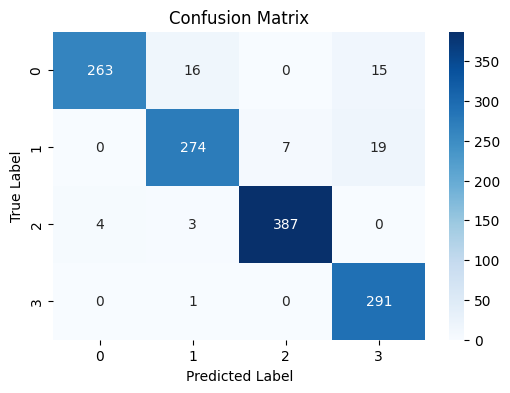

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(_truth, _pred)

plt.figure(figsize=(6, 4))

# Create the heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(_truth), yticklabels=np.unique(_pred))

# Add labels and title
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")